In [1]:
import os 
import nibabel as nib
from nilearn.input_data import NiftiLabelsMasker
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats as stats
import json
from nilearn.connectome import ConnectivityMeasure

In [2]:
bold_files = sorted(glob("/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/*"))
confound_files = sorted(glob("/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/confound_files/*"))

In [4]:
pd.read_csv(confound_files[0]).columns

Index(['Unnamed: 0', 'csf', 'white_matter', 'global_signal', 'std_dvars',
       'dvars', 'framewise_displacement', 't_comp_cor_00', 't_comp_cor_01',
       't_comp_cor_02', 't_comp_cor_03', 't_comp_cor_04', 't_comp_cor_05',
       'a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'a_comp_cor_05', 'cosine00', 'cosine01', 'cosine02',
       'cosine03', 'cosine04', 'trans_x', 'trans_y', 'trans_z', 'rot_x',
       'rot_y', 'rot_z'],
      dtype='object')

In [ ]:
keep_confounds = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y',
                      'rot_z', 'framewise_displacement', 'a_comp_cor_00',
                      'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
                      'a_comp_cor_04', 'a_comp_cor_05', 'csf',
                      'white_matter']

In [4]:
dkt_filled_in_atlas = nib.load("/home/users/llevitis/ace_mount/ace_home/DIAN/DKT_filledin.nii")

In [5]:
dkt_mindboggle_atlas = nib.load("/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz")
dkt_mindboggle_labels_df = pd.read_csv("/home/users/llevitis/ace_mount/ace_home/DIAN/dst_labels.csv", header=None)

In [6]:
dkt_labels = list(dkt_mindboggle_labels_df[1])
dkt_labels_left = ['Left%s'%x for x in dkt_labels[:39]]
dkt_labels_right = ['Right%s'%x for x in dkt_labels[39:78]]
dkt_labels = dkt_labels_left + dkt_labels_right + dkt_labels[78:80] 
dkt_labels.append("unknown1")
dkt_labels.append("unknown2") 
dkt_labels.append("unknown3")

In [7]:
with open("dkt_labels.txt", "w") as f: 
    f.write(",".join(dkt_labels))

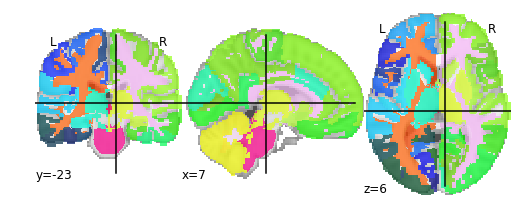

In [8]:
%matplotlib inline
plotting.plot_roi(dkt_filled_in_atlas)

In [9]:
masker = NiftiLabelsMasker(labels_img=dkt_mindboggle_atlas, standardize=True,
                           memory='nilearn_cache', verbose=5)

In [10]:
dkt_mindboggle_atlas.shape

(182, 218, 182)

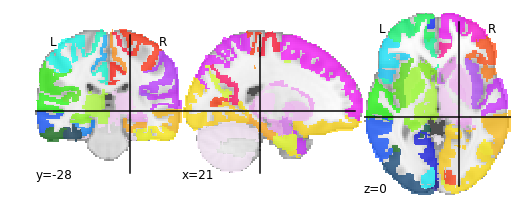

In [11]:
%matplotlib inline
plotting.plot_roi(dkt_mindboggle_atlas)

In [11]:
time_series_dict = {}
for i, bold_file in enumerate(bold_files): 
    sub_ses = bold_file.split("/")[9][0:18]
    time_series = masker.fit_transform(bold_files[i], confounds=confound_files[i])
    time_series_dict[sub_ses] = time_series

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]0.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]0.6s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]1.2s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
_______________________________________

[Memory]20.8s, 0.3min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]21.6s, 0.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]22.6s, 0.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]23.4s, 0.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMaske

[Memory]39.9s, 0.7min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]40.7s, 0.7min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]41.4s, 0.7min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]42.1s, 0.7min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

[Memory]60.6s, 1.0min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]61.4s, 1.0min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]62.1s, 1.0min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]62.8s, 1.0min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

[Memory]81.8s, 1.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]82.5s, 1.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]83.3s, 1.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]84.1s, 1.4min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-ALSGL2_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fbab3a96ef0>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds='/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/confound_files/sub-ALSGL2_ses-v00_task-rest_desc-confounds_regressors.tsv', dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data from /home/users/llevitis/ace_mount/ace_home/DIAN/final_fm

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]126.0s, 2.1min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]126.8s, 2.1min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]127.6s, 2.1min  : Loading filter_and_extract...
__________________________________filter_and_extract 

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]146.6s, 2.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]147.3s, 2.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]148.2s, 2.5min  : Loading filter_and_extract...
__________________________________filter_and_extract 

[Memory]170.1s, 2.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]170.9s, 2.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]171.7s, 2.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]172.6s, 2.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

[Memory]194.5s, 3.2min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.1s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]195.5s, 3.3min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]196.2s, 3.3min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]196.9s, 3.3min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

Resampling labels
[Memory]216.8s, 3.6min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]217.5s, 3.6min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]218.2s, 3.6min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
fil

[Memory]240.6s, 4.0min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]241.4s, 4.0min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]242.2s, 4.0min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]243.0s, 4.1min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

[Memory]265.2s, 4.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]265.9s, 4.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]266.7s, 4.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]267.4s, 4.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

[Memory]287.5s, 4.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]288.5s, 4.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]289.2s, 4.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]289.9s, 4.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMaske

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.5s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]308.3s, 5.1min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]309.1s, 5.2min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]309.8s, 5.2min  : Loading filter_and_extract...
__________________________________filter_and_extract 

Resampling labels
[Memory]330.5s, 5.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]331.6s, 5.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
[Memory]332.4s, 5.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]333.0s, 5.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min

[Memory]352.8s, 5.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]353.5s, 5.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]354.3s, 5.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
[Memory]355.1s, 5.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from N

In [12]:
len(time_series_dict)

424

In [14]:
time_series_dict_list = {} 
for x in time_series_dict:
    time_series_dict_list[x] = time_series_dict[x].tolist()

In [15]:
with open("time_series_dict.json", "w") as f:
    json.dump(time_series_dict_list, f)

## Create different correlation matrices (using correlation or sparse inverse covariance)

In [43]:
with open('time_series_dict.json') as f:
    time_series_dict = json.load(f)

for x in time_series_dict: 
    time_series_dict[x] = np.asarray(time_series_dict[x])

In [32]:
dkt_filled_in_atlas = nib.load("/home/users/llevitis/ace_mount/ace_home/DIAN/DKT_filledin.nii")

with open("dkt_labels.txt", "r") as f: 
    dkt_labels = f.read()
    dkt_labels = dkt_labels.split(",")

In [39]:
genetic_df = pd.read_csv("../../data/DIAN/participant_metadata/GENETIC_D1801.csv")

In [40]:
noncarriers = []
mutcarriers = []
for sub in time_series_dict: 
    sub_id = sub.split("_")[0].split("-")[1]
    if genetic_df[genetic_df.IMAGID == sub_id].Mutation.values[0] == 0: 
        noncarriers.append(sub) 
    else: 
        mutcarriers.append(sub)

In [45]:
correlation_measure = ConnectivityMeasure(kind='correlation')
nc_correlation_matrices = [] 
mc_correlation_matrices = []
for x in time_series_dict: 
    corr_mat = correlation_measure.fit_transform([time_series_dict[x]])[0] 
    if x in noncarriers: 
        nc_correlation_matrices.
        append(corr_mat)
    else: 
        mc_correlation_matrices.append(corr_mat)

In [ ]:
correlation_measure = ConnectivityMeasure(kind='partial correlation')
nc_correlation_matrices = [] 
mc_correlation_matrices = []
for x in time_series_dict: 
    corr_mat = correlation_measure.fit_transform([time_series_dict[x]])[0] 
    if x in noncarriers: 
        nc_correlation_matrices.
        append(corr_mat)
    else: 
        mc_correlation_matrices.append(corr_mat)

In [55]:
try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

In [67]:
nc_sic_matrices = [] 
mc_sic_matrices = []
for x in time_series_dict: 
    estimator = GraphicalLassoCV()
    sic_mat = estimator.fit(time_series_dict[x])
    if x in noncarriers: 
        nc_sic_matrices.append(sic_mat)
    else: 
        mc_sic_matrices.append(sic_mat)

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _uma

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _uma

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:240: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:242: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinic

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:240: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:242: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: Y

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
 

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _uma

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _uma

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/l

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of r

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:238: RuntimeWarning: divide by zero encountered in double_scalars
  - np.dot(covariance_[indices != idx, idx], coefs)))
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:240: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:242: RuntimeWarning: invalid value encountered in multiply
  * coefs)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:51: RuntimeWarning: invalid value encountered in multiply
  gap = np.sum(emp_cov * precision_)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/covariance/empirical_covariance_.py:44: RuntimeWarning: invalid value encountered in multiply
  log_likelihood_ = - np.sum(emp_cov * precision

FloatingPointError: Non SPD result: the system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver

In [70]:
nc_sic_matrices = [x.covariance_ for x in nc_sic_matrices]

In [72]:
mc_sic_matrices = [x.covariance_ for x in mc_sic_matrices]

In [74]:
nc_sic_matrices_4d = np.stack(nc_sic_matrices)
mc_sic_matrices_4d = np.stack(mc_sic_matrices)

nc_avg_sic_matrix = np.mean(nc_sic_matrices_4d, axis=0)
mc_avg_sic_matrix = np.mean(mc_sic_matrices_4d, axis=0)

In [75]:
np.savetxt("DIAN_FC_NC_SIC_Matrix_Avg", nc_avg_sic_matrix, delimiter=",")
np.savetxt("DIAN_FC_MC_SIC_Matrix_Avg", mc_avg_sic_matrix, delimiter=",")

In [48]:
len(nc_correlation_matrices)

163

In [49]:
len(mc_correlation_matrices)

261

In [50]:
nc_correlation_matrices_4d = np.stack(nc_correlation_matrices)
mc_correlation_matrices_4d = np.stack(mc_correlation_matrices)

nc_avg_correlation_matrix = np.mean(nc_correlation_matrices_4d, axis=0)
mc_avg_correlation_matrix = np.mean(mc_correlation_matrices_4d, axis=0)

In [52]:
np.savetxt("DIAN_FC_NC_Correlation_Matrix_Avg", nc_avg_correlation_matrix, delimiter=",")
np.savetxt("DIAN_FC_MC_Correlation_Matrix_Avg", mc_avg_correlation_matrix, delimiter=",")


In [25]:
nc_avg_correlation_matrix = pd.read_csv("DIAN_FC_NC_Correlation_Matrix_Avg", sep=",", header=None).values
mc_avg_correlation_matrix = pd.read_csv("DIAN_FC_MC_Correlation_Matrix_Avg", sep=",", header=None).values


In [26]:
nc_avg_correlation_matrix

array([[ 1.00000000e+00, -4.63926974e-02,  1.62942173e-02, ...,
        -1.63374051e-02, -1.48179214e-02,  5.53314178e-04],
       [-4.63926973e-02,  1.00000000e+00, -1.66873388e-01, ...,
        -6.00420892e-02, -1.16037459e-01, -8.57748878e-02],
       [ 1.62942173e-02, -1.66873388e-01,  1.00000000e+00, ...,
        -3.74377311e-02,  8.84902574e-02,  2.88384908e-02],
       ...,
       [-1.63374051e-02, -6.00420892e-02, -3.74377311e-02, ...,
         1.00000000e+00,  2.58284532e-01,  1.69161624e-01],
       [-1.48179214e-02, -1.16037459e-01,  8.84902574e-02, ...,
         2.58284532e-01,  1.00000000e+00,  2.04317395e-01],
       [ 5.53314178e-04, -8.57748879e-02,  2.88384908e-02, ...,
         1.69161624e-01,  2.04317395e-01,  1.00000000e+00]])

Text(0.5, 1.0, 'Mutation carriers')

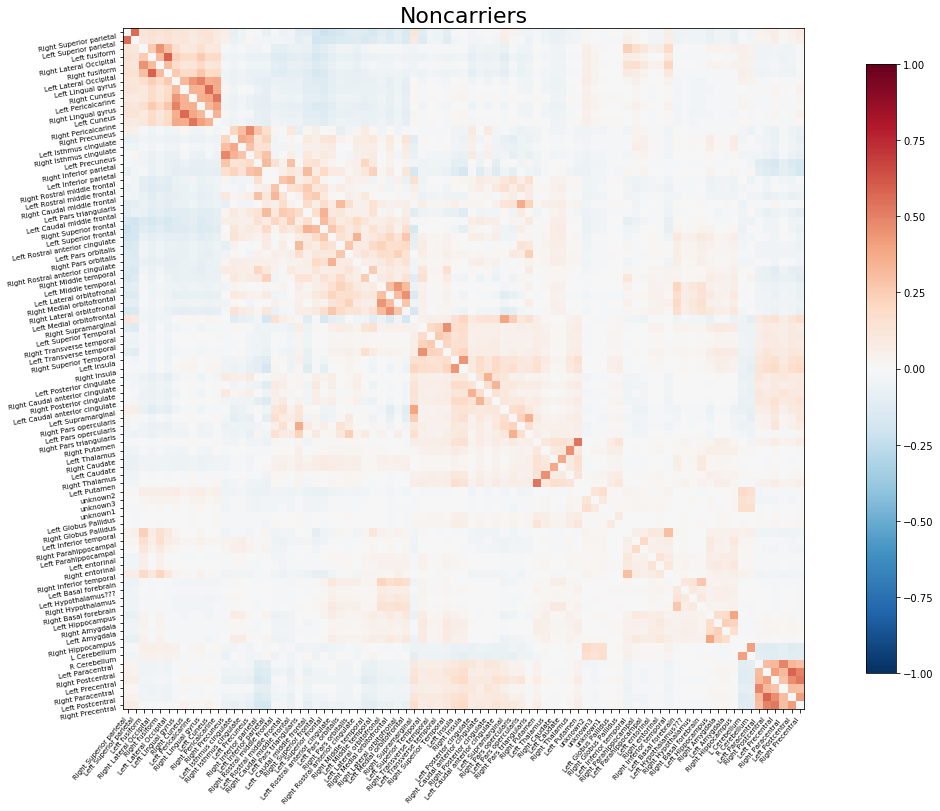

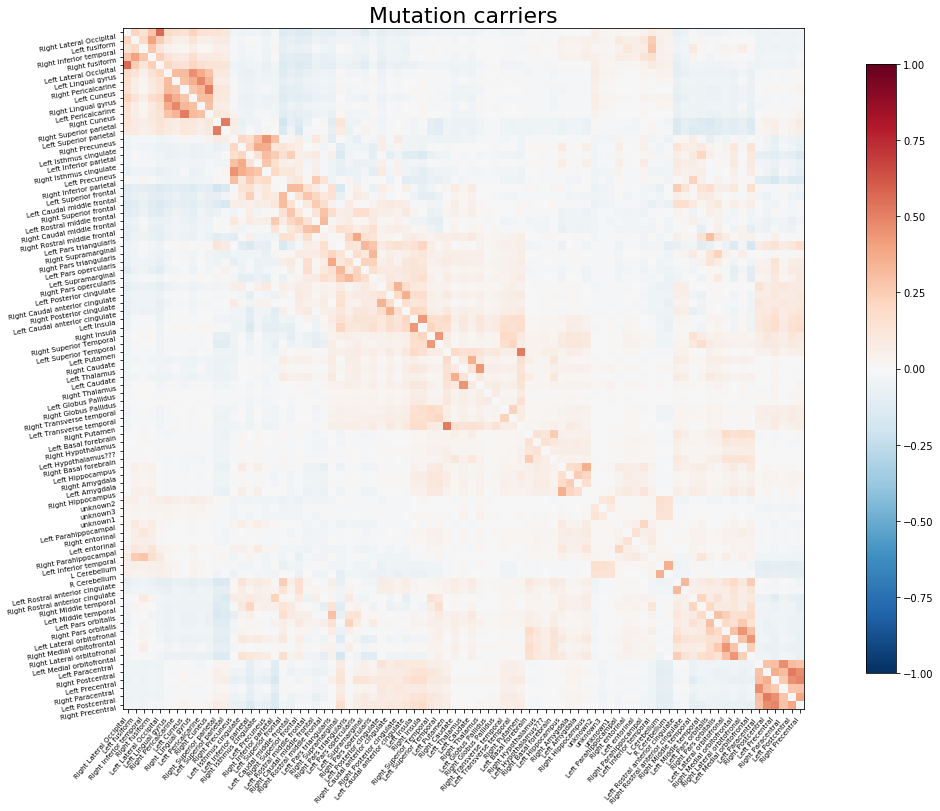

In [78]:
# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(nc_avg_sic_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_sic_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Noncarriers", fontsize=22)

# matrices are ordered for block-like representation
np.fill_diagonal(mc_avg_sic_matrix, 0)
plotting.plot_matrix(mc_avg_sic_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Mutation carriers", fontsize=22)

Text(0.5, 1.0, 'Mutation carriers')

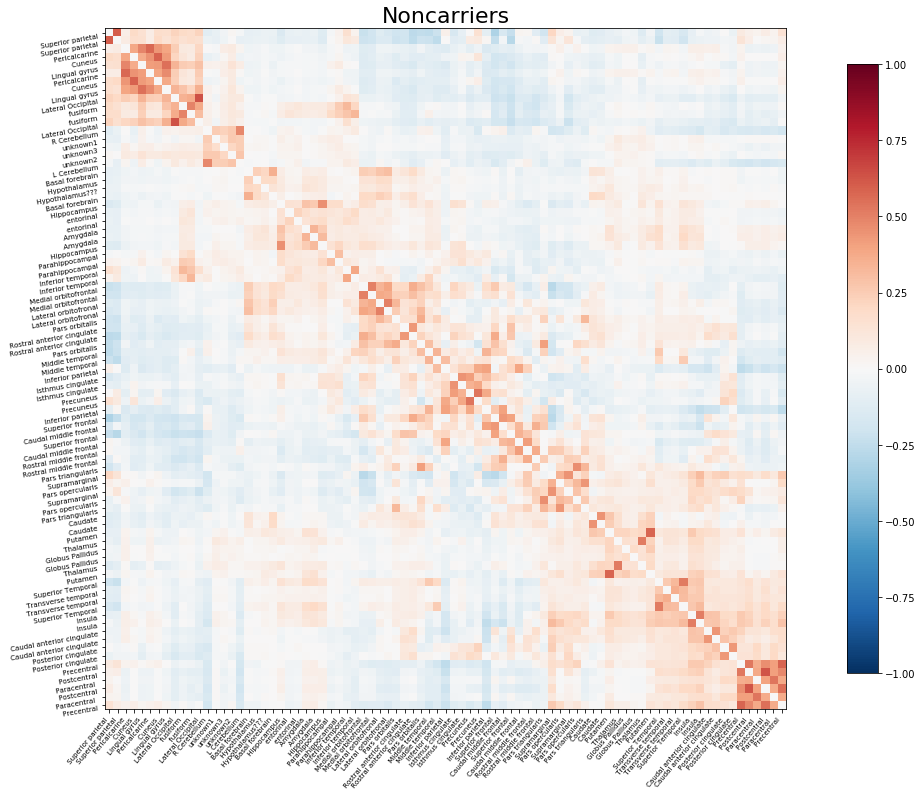

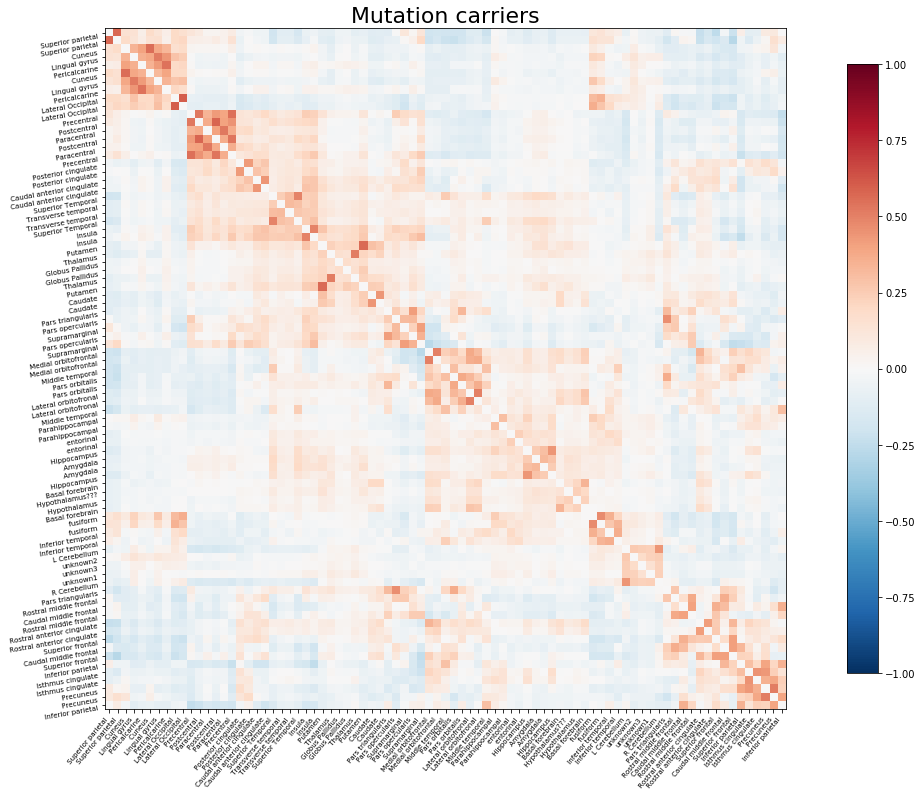

In [27]:
# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(nc_avg_correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_correlation_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Noncarriers", fontsize=22)

# matrices are ordered for block-like representation
np.fill_diagonal(mc_avg_correlation_matrix, 0)
plotting.plot_matrix(mc_avg_correlation_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Mutation carriers", fontsize=22)

### Create thresholded & min max scaled connectivity matrices using the average rs-fMRI matrices created using either correlation as the connectivity measure or sparse inverse covariance

In [82]:
coordinates, labels_list = plotting.find_parcellation_cut_coords(labels_img=dkt_mindboggle_atlas, return_label_names=True)

In [ ]:
plotting.plot_connectome(mc_avg_sic_matrix, coordinates,
                         edge_threshold="90%", colorbar=True, title="DKT Mindboggle Atlas", edge_vmin=-0.7)

plotting.show()

In [101]:
thresholded_matrices = [nc_avg_sic_matrix, nc_avg_correlation_matrix]
for k, mat in enumerate([nc_avg_sic_matrix, nc_avg_correlation_matrix]): 
    print(k)
    all_sub_corr_90p = np.percentile(mat.flatten(), 90)
    for i in range(0, 83): 
        for j in range(0, 83):
            if thresholded_matrices[k][i][j] < all_sub_corr_90p: 
                thresholded_matrices[k][i][j] = 0

0
1


In [102]:
nc_avg_correlation_matrix_thresholded = thresholded_matrices[0]
nc_avg_sic_matrix_thresholded = thresholded_matrices[1]

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()
scaler.fit(nc_avg_correlation_matrix_thresholded.flatten().reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(nc_avg_sic_matrix_thresholded.flatten().reshape(-1,1))


MinMaxScaler(copy=True, feature_range=(0, 1))

In [109]:
nc_avg_correlation_matrix_thresholded = scaler.transform(nc_avg_correlation_matrix_thresholded)
nc_avg_sic_matrix_thresholded = scaler.transform(nc_avg_sic_matrix_thresholded)

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/nilearn/plotting/matrix_plotting.py:99: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(mat, method=reorder)
/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/nilearn/plotting/matrix_plotting.py:100: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ordered_linkage = optimal_leaf_ordering(linkage_matrix, mat)


Text(0.5, 1.0, 'Noncarriers, Sparse Inverse Covariance')

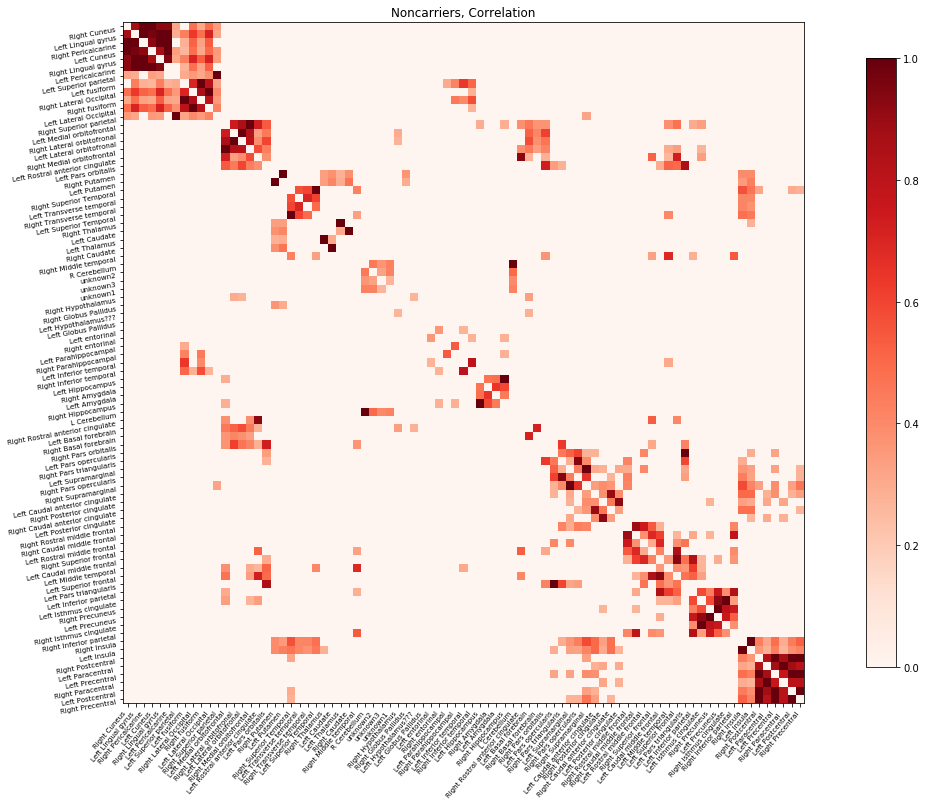

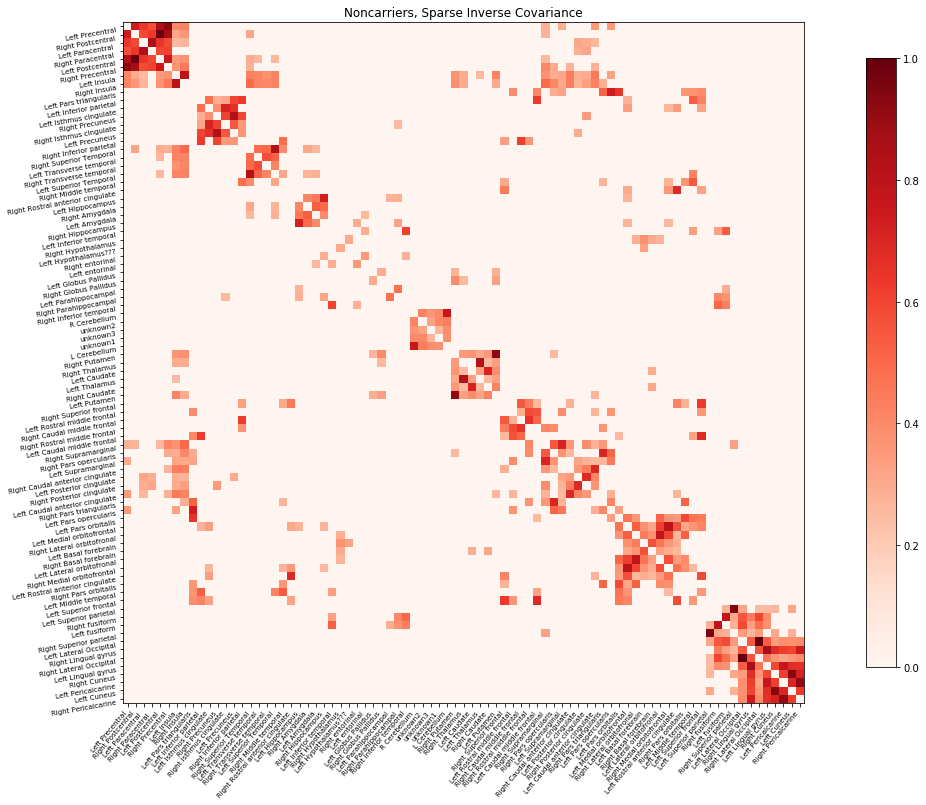

In [110]:
# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(nc_avg_correlation_matrix_thresholded, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_correlation_matrix_thresholded,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=0, reorder=True, cmap="Reds")

plt.title("Noncarriers, Correlation")

np.fill_diagonal(nc_avg_sic_matrix_thresholded, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_sic_matrix_thresholded,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=0, reorder=True, cmap="Reds")

plt.title("Noncarriers, Sparse Inverse Covariance")

### Use the built-in Group Sparse Inverse Covariance

In [112]:
from nilearn import image
from nilearn import input_data

In [119]:
subject_time_series = [] 
for x in time_series_dict: 
    if x in noncarriers: 
        subject_time_series.append(time_series_dict[x])

In [120]:
from nilearn.connectome import GroupSparseCovarianceCV
gsc = GroupSparseCovarianceCV(verbose=2)
gsc.fit(subject_time_series)

try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=2)
gl.fit(np.concatenate(subject_time_series))

/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.0s remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 2
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 9
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 11


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 13
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 13
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 12
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  4 out of 4
[GroupSparseCovarianceCV.fit] Final optimization


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min finished


[GroupSparseCovarianceCV.fit] tolerance reached at iteration number 22: 8.670e-04


/data1/llevitis/miniconda3/envs/clinicaEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
........[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   1s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
........[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
........[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


....[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
........[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  10s
[graphical_lasso] Iteration   0, cost  3.52e+02, dual gap 6.198e-01
[graphical_lasso] Iteration   1, cost  3.51e+02, dual gap -1.245e-02
[graphical_lasso] Iteration   2, cost  3.51e+02, dual gap -2.033e-03
[graphical_lasso] Iteration   3, cost  3.51e+02, dual gap -3.468e-04
[graphical_lasso] Iteration   4, cost  3.51e+02, dual gap -4.493e-08


GraphicalLassoCV(alphas=4, assume_centered=False, cv='warn', enet_tol=0.0001,
         max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
         verbose=2)

In [122]:
def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing. """

    prec = prec.copy()  # avoid side effects

    # Put zeros on the diagonal, for graph clarity.
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))

    # Display covariance matrix
    plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                         vmin=-1, vmax=1, title="%s / covariance" % title,
                         labels=labels)
    # Display precision matrix
    plotting.plot_matrix(prec, cmap=plotting.cm.bwr,
                         vmin=-span, vmax=span, title="%s / precision" % title,
                         labels=labels)

In [135]:
np.savetxt("dian_fs_nc_gl_covariance", gl.covariance_, delimiter=",")
np.savetxt("dian_fs_nc_gl_precision", gl.precision_, delimiter=",")

np.savetxt("dian_fs_nc_gsc_covariance", gsc.covariances_[...,0], delimiter=",")
np.savetxt("dian_fs_nc_gsc_precision", gsc.precisions_[..., 0], delimiter=",")

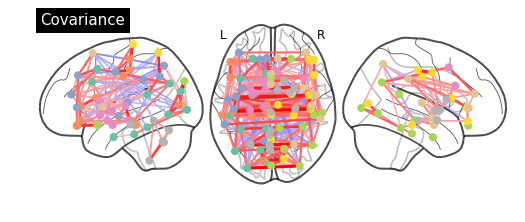

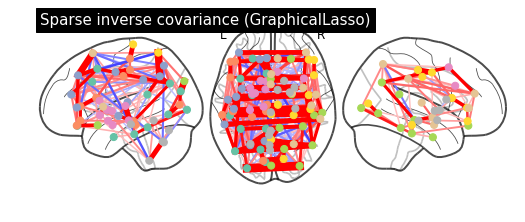

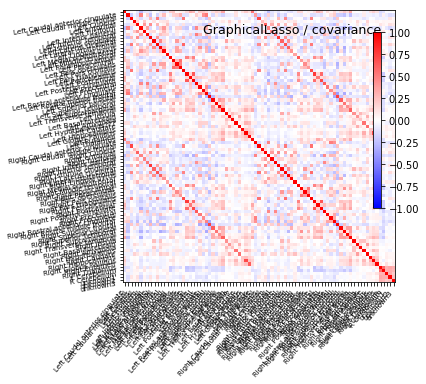

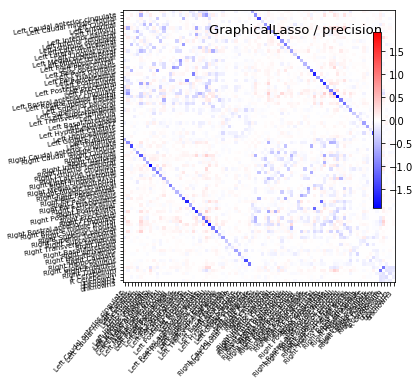

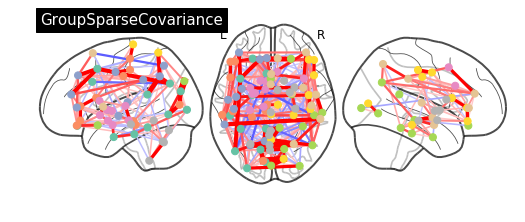

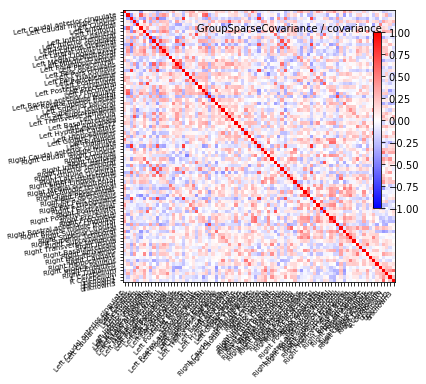

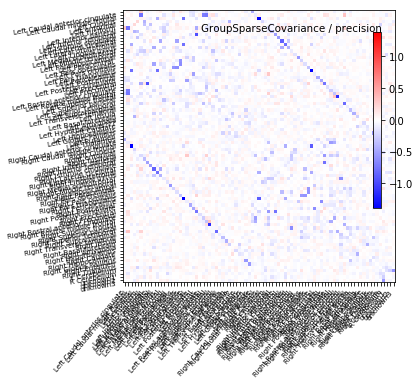

In [123]:
plotting.plot_connectome(gl.covariance_,
                         coordinates, edge_threshold='90%',
                         title="Covariance",
                         display_mode="lzr")
plotting.plot_connectome(-gl.precision_, coordinates,
                         edge_threshold='90%',
                         title="Sparse inverse covariance (GraphicalLasso)",
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", dkt_labels)

title = "GroupSparseCovariance"
plotting.plot_connectome(-gsc.precisions_[..., 0],
                         coordinates, edge_threshold='90%',
                         title=title,
                         display_mode="lzr",
                         edge_vmax=.5, edge_vmin=-.5)
plot_matrices(gsc.covariances_[..., 0],
              gsc.precisions_[..., 0], title, dkt_labels)

plotting.show()

In [136]:
## test the tangent space correlation measure

In [140]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subject_time_series)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of children are stacked in an array of shape {0}'.format(correlation_matrices.shape))

Correlations of children are stacked in an array of shape (163, 83, 83)


In [141]:
mean_correlation_matrix = correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))

Mean correlation has shape (83, 83).


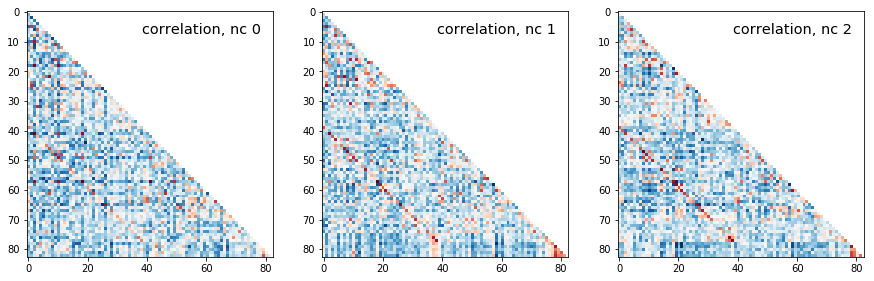

In [142]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(correlation_matrices, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax,
                         title='correlation, nc {}'.format(i))

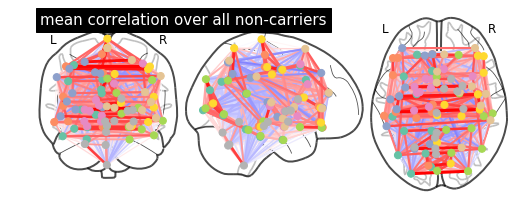

In [144]:
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         title='mean correlation over all non-carriers')

In [145]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrices = partial_correlation_measure.fit_transform(subject_time_series)

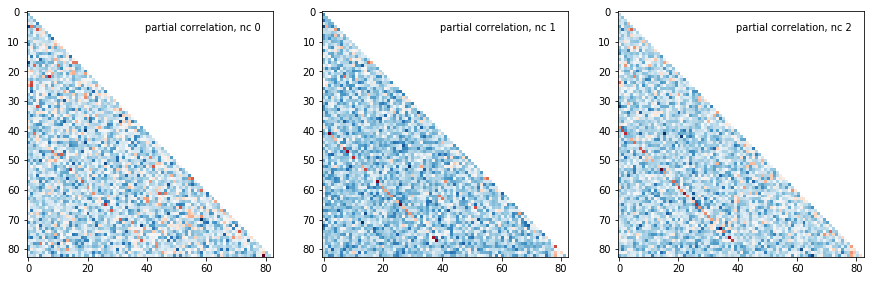

In [146]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(partial_correlation_matrices, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax,
                         title='partial correlation, nc {}'.format(i))


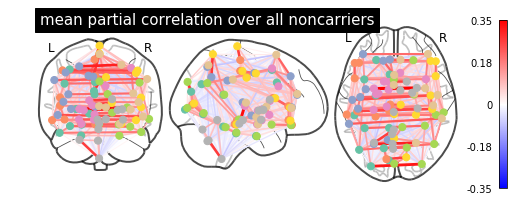

In [159]:
plotting.plot_connectome(
    partial_correlation_measure.mean_, coordinates,
    title='mean partial correlation over all noncarriers', 
    colorbar=True)

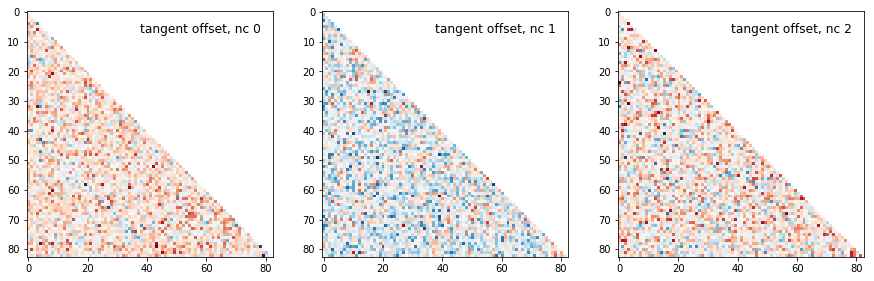

In [148]:
tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(subject_time_series)
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(tangent_matrices, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax,
                         title='tangent offset, nc {}'.format(i))

In [161]:
tangent_measure.mean_

array([[ 0.68714165, -0.02104052,  0.00755864, ..., -0.01547285,
        -0.00965694, -0.0026793 ],
       [-0.02104052,  0.65989603, -0.08694056, ..., -0.03562952,
        -0.06124628, -0.04647431],
       [ 0.00755864, -0.08694056,  0.66377288, ..., -0.02369117,
         0.0460853 ,  0.01455353],
       ...,
       [-0.01547285, -0.03562952, -0.02369117, ...,  0.71124714,
         0.14926586,  0.09415228],
       [-0.00965694, -0.06124628,  0.0460853 , ...,  0.14926586,
         0.71938886,  0.11830754],
       [-0.0026793 , -0.04647431,  0.01455353, ...,  0.09415228,
         0.11830754,  0.72432782]])

In [172]:
regions = ["Left Precuneus", "Left Hippocampus", "Left Posterior cingulate"] 
measure_names = ["Tangent", "Correlation", "Partial Correlation"]
for i,measure in enumerate([tangent_measure, correlation_measure, partial_correlation_measure]):  
    print("\n{0}\n".format(measure_names[i]))
    df = pd.DataFrame(measure.mean_, index=dkt_labels, columns=dkt_labels)
    for region in regions: 
        print("\n{0}\n".format(region))
        print(df[region].sort_values(ascending=False)[0:10])


Tangent


Left Precuneus

Left Precuneus                0.669403
Right Precuneus               0.314552
Left Isthmus cingulate        0.248080
Left Inferior parietal        0.217594
Right Isthmus cingulate       0.204475
Right Inferior parietal       0.130623
Left Posterior cingulate      0.114465
Left Caudal middle frontal    0.088129
Right Posterior cingulate     0.077324
Left Superior frontal         0.074665
Name: Left Precuneus, dtype: float64

Left Hippocampus

Left Hippocampus             0.710096
Right Hippocampus            0.274779
Left Amygdala                0.175989
Right Amygdala               0.156484
Right Parahippocampal        0.105572
Left Parahippocampal         0.103265
Left Medial orbitofrontal    0.091269
Left Superior Temporal       0.085275
Left entorinal               0.084864
Left Isthmus cingulate       0.083617
Name: Left Hippocampus, dtype: float64

Left Posterior cingulate

Left Posterior cingulate           0.716113
Right Posterior cingulate          0.

## Re-run analyses by removing a subset of confounds

In [5]:
bold_files = sorted(glob("/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/*"))
confound_files = sorted(glob("/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/confound_files/*"))

In [7]:
keep_confounds = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y',
                  'rot_z', 'framewise_displacement', 'a_comp_cor_00',
                  'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
                  'a_comp_cor_04', 'a_comp_cor_05', 'csf',
                  'white_matter']

In [8]:
dkt_filled_in_atlas = nib.load("/home/users/llevitis/ace_mount/ace_home/DIAN/DKT_filledin.nii")

with open("dkt_labels.txt", "r") as f: 
    dkt_labels = f.read()
    dkt_labels = dkt_labels.split(",")

In [26]:
def _reduce_confounds(regressors, keep_confounds):
    reduced_regressors = []
    for in_file in regressors:
        out_file = in_file.replace('desc-confounds',
                                   'desc-reducedConfounds')
        if not os.path.isfile(out_file):
            confounds = pd.read_csv(in_file)
            selected_confounds = confounds[keep_confounds]
            #header = '\t'.join(selected_confounds.dtype.names)
            selected_confounds.to_csv(out_file)
            #np.savetxt(out_file, np.array(selected_confounds.tolist()),
            #           header=header, delimiter='\t', comments='')
        reduced_regressors.append(out_file)
    return reduced_regressors

In [27]:
regressors = _reduce_confounds(confound_files, keep_confounds)

In [30]:
dkt_mindboggle_atlas = nib.load("/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz")
masker = NiftiLabelsMasker(labels_img=dkt_mindboggle_atlas, standardize=True,
                           memory='nilearn_cache', verbose=5)

In [31]:
time_series_dict = {}
for i, bold_file in enumerate(bold_files): 
    sub_ses = bold_file.split("/")[9][0:18]
    time_series = masker.fit_transform(bold_files[i], confounds=regressors[i])
    time_series_dict[sub_ses] = time_series

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-0F9ACS_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds='/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/confound_files/sub-0F9ACS_ses-v00_task-rest_desc-reducedConfounds_regressors.tsv', dtype=None, memory=Memory(location=nilea

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-0ZI871_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-1FFP6Y_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-2D1APM_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-2FAMDB_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-2VVTM5_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-34E2IA_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-3RC7PE_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-3YMWAT_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-44CAVQ_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-4KEGQV_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-5FZWKH_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-5OGELK_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-6CMY4P_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-7713O3_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-7IXXOA_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-837HA5_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-8AKUN6_ses-v05_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-8IFJ11_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-9HBSN9_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-9V76YB_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-A954XQ_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-ANUED7_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-BNAJMF_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-BS2VBS_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-CXRL3E_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-DA0DVX_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-DEHYCW_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-DOCS1R_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-ERMK2N_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-F2T4YV_ses-v05_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-FVPVRA_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-GQ3NXG_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-HAB9WN_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-HTNQJS_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-IP8JVC_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-IZHCNQ_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 2.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-JKKHTX_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-JR429C_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-KG4W9Z_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-L0KYTY_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-L8O49P_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-LFSEUQ_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-MHB2SW_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-MTVKBE_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds='/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/confound_files/sub-MTVKBE_ses-v00_task-rest_desc-reducedConfounds_regressors.tsv', dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data from /home/users/llevitis/ace_mou

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-NK39BV_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-O1P1MI_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.9s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-OD8ZMU_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-OOSXI9_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-OTO2HD_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-PAU8PN_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-PCQ6GI_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-PVACF4_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-QQ3EQ6_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-RA9E9U_ses-v02_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-RZ9XPJ_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.8s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-SGOJ8O_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-SRH9ND_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-TCJ2GZ_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'targe

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-TUKIOI_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-U5Q0SQ_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-USPD91_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.6s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-V24NB2_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-VPEKVQ_ses-v01_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-WDQRU0_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-WGNDC1_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-WQCPKV_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-X8P4MK_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-YCWSCU_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-YSHQGT_ses-v00_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
_______________________________________________filter_and_extract - 1.7s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/users/llevitis/ace_mount/ace_home/DIAN/dkt_atlas_1mm.nii.gz')
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/users/llevitis/ace_mount/ace_home/DIAN/final_fmri_output_dir/preproc_bold_scans/sub-ZJVKU1_ses-v03_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe2bcbe2ba8>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, c

In [35]:
genetic_df = pd.read_csv("../../data/DIAN/participant_metadata/GENETIC_D1801.csv")

In [36]:
noncarriers = []
mutcarriers = []
for sub in time_series_dict: 
    sub_id = sub.split("_")[0].split("-")[1]
    if genetic_df[genetic_df.IMAGID == sub_id].Mutation.values[0] == 0: 
        noncarriers.append(sub) 
    else: 
        mutcarriers.append(sub)

In [69]:
correlation_measure = ConnectivityMeasure(kind='correlation')
nc_correlation_matrices = [] 
mc_correlation_matrices = []
for x in time_series_dict: 
    corr_mat = correlation_measure.fit_transform([time_series_dict[x]])[0] 
    if x in noncarriers: 
        nc_correlation_matrices.append(corr_mat)
    else: 
        mc_correlation_matrices.append(corr_mat)

In [70]:
nc_correlation_matrices_4d = np.stack(nc_correlation_matrices)
mc_correlation_matrices_4d = np.stack(mc_correlation_matrices)

nc_avg_correlation_matrix = np.mean(nc_correlation_matrices_4d, axis=0)
mc_avg_correlation_matrix = np.mean(mc_correlation_matrices_4d, axis=0)

Text(0.5, 1.0, 'Mutation carriers')

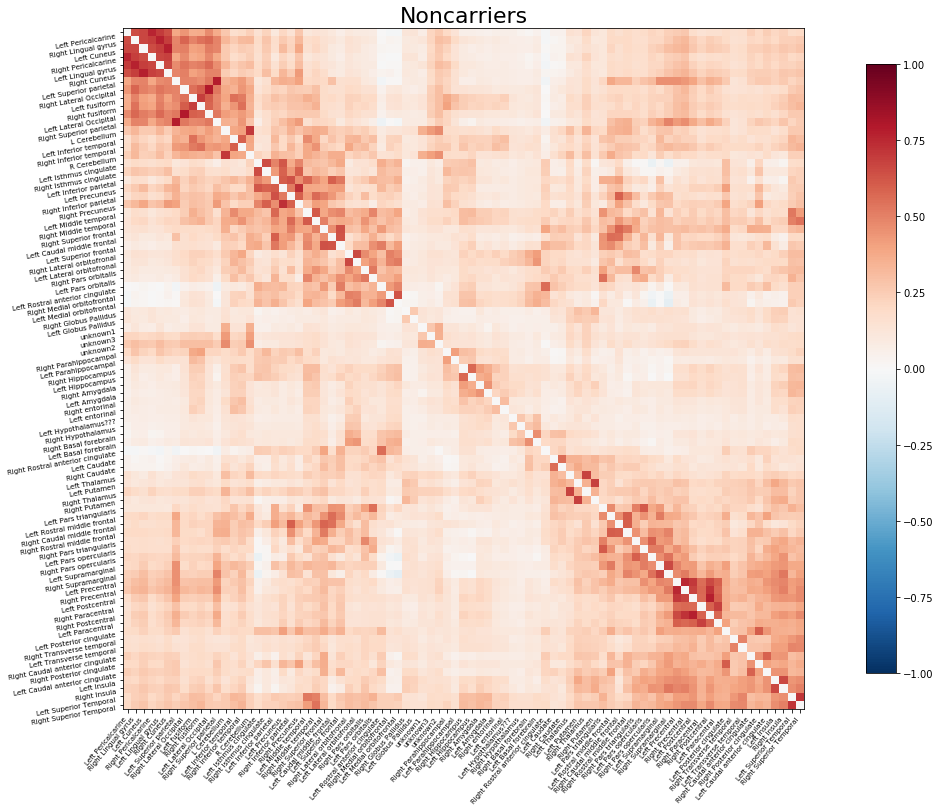

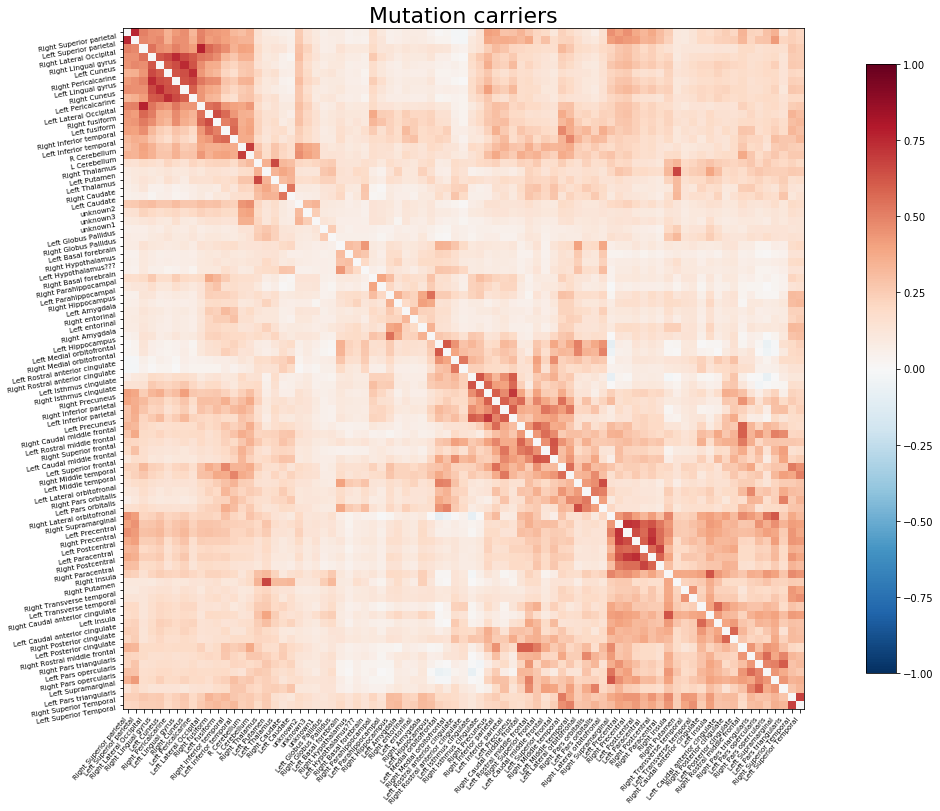

In [71]:
# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(nc_avg_correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_correlation_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Noncarriers", fontsize=22)

# matrices are ordered for block-like representation
np.fill_diagonal(mc_avg_correlation_matrix, 0)
plotting.plot_matrix(mc_avg_correlation_matrix,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Mutation carriers", fontsize=22)

In [90]:
from copy import copy, deepcopy
from sklearn.preprocessing import MinMaxScaler

In [86]:
nc_avg_correlation_matrix_thresholded = deepcopy(nc_avg_correlation_matrix)

In [87]:
nc_avg_correlation_matrix_thresholded = deepcopy(nc_avg_correlation_matrix)

threshold_p75 = np.percentile(nc_avg_correlation_matrix.flatten(), 75)

for i in range(0, 83): 
    for j in range(0, 83): 
        if nc_avg_correlation_matrix_thresholded[i][j] < threshold_p90:
            #print(nc_avg_correlation_matrix_thresholded[i][j])
            nc_avg_correlation_matrix_thresholded[i][j] = 0

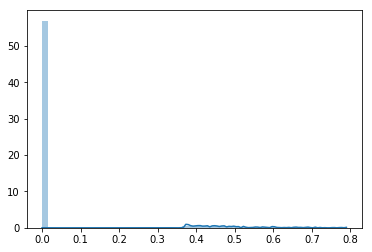

In [88]:
sns.distplot(nc_avg_correlation_matrix_thresholded.flatten())

Text(0.5, 1.0, 'Noncarriers')

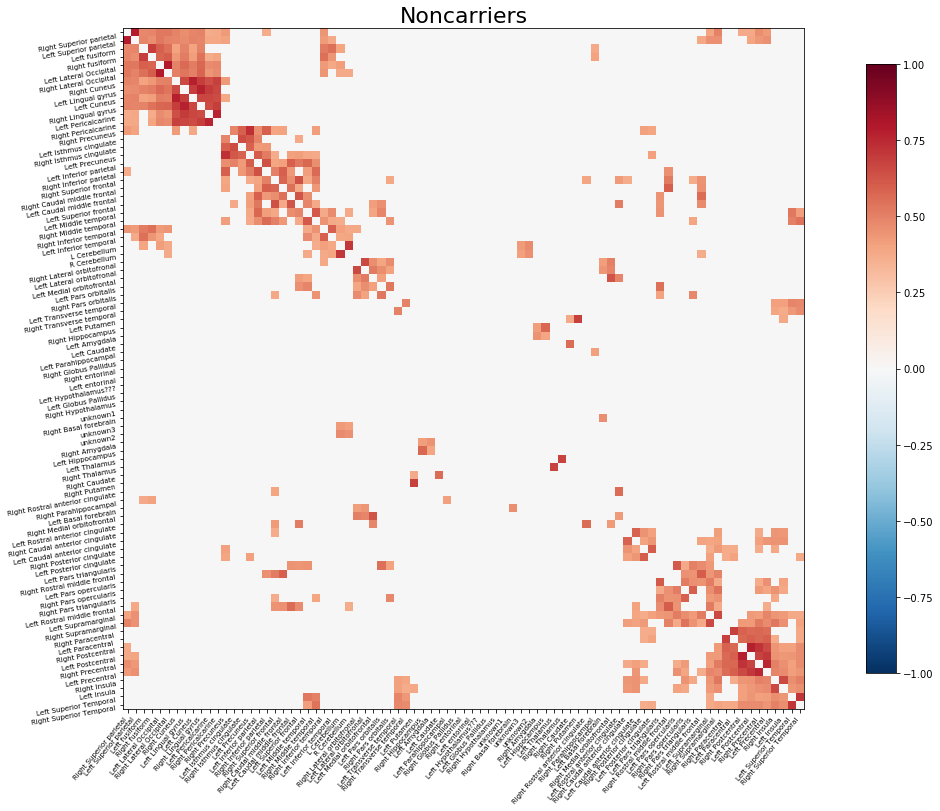

In [89]:
np.fill_diagonal(nc_avg_correlation_matrix_thresholded, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_correlation_matrix_thresholded,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=True, cmap="RdBu_r")
plt.title("Noncarriers", fontsize=22)

In [92]:
scaler = MinMaxScaler()
scaler.fit(nc_avg_correlation_matrix_thresholded.flatten().reshape(-1,1))
nc_avg_correlation_matrix_thresholded = scaler.transform(nc_avg_correlation_matrix_thresholded)


Text(0.5, 1.0, 'Noncarriers')

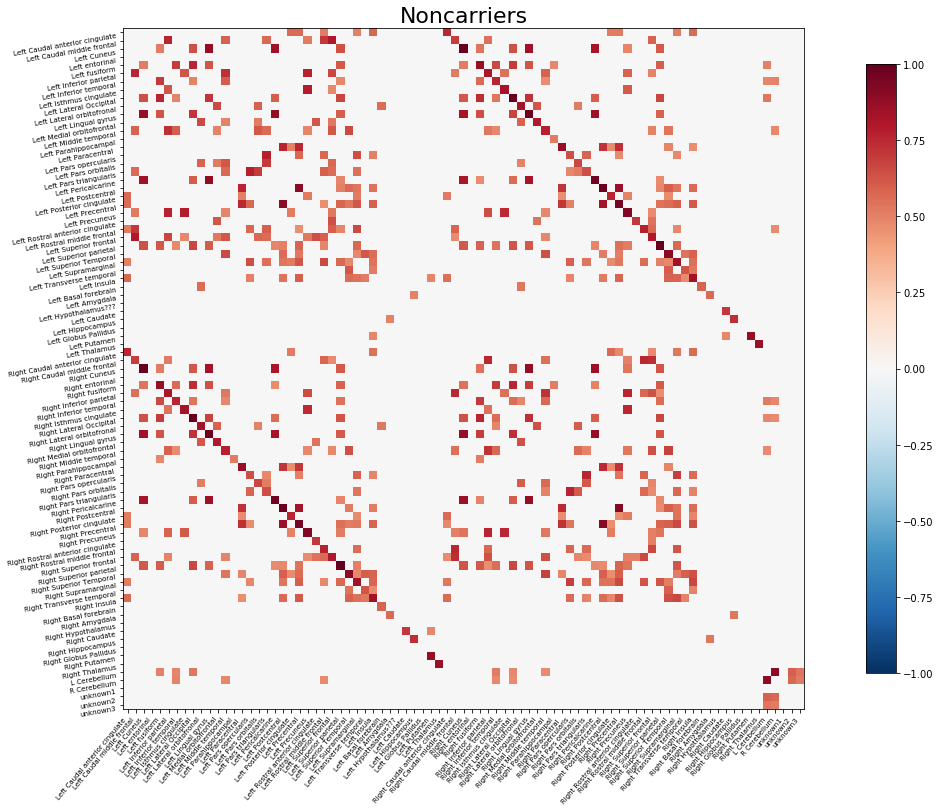

In [94]:
np.fill_diagonal(nc_avg_correlation_matrix_thresholded, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(nc_avg_correlation_matrix_thresholded,labels=dkt_labels,figure=(14,14),
                     vmax=1, vmin=-1, reorder=False, cmap="RdBu_r")
plt.title("Noncarriers", fontsize=22)

In [95]:
    np.savetxt("DIAN_FC_NC_Correlation_Matrix_Avg_ReducedConfounds", nc_avg_correlation_matrix_thresholded, delimiter=",")